# Indonesia Air Pollution Analysis

Proyek ini bertujuan untuk melakukan Analisis Data Eksploratif pada data Kondisi Kualitas Udara di Indonesia. Kumpulan data ini berisi data geolokasi mengenai polutan berikut: Nitrogen Dioksida, Ozon, Karbon Monoksida, dan Partikel.


## Asking and Answering Questions
### Untuk menyelesaikan studi kasus ini, silakan jawab setiap pertanyaan berikut setelah selesai melakukan replikasi program python ini. Have a fun coding ^_^


**Q1: Bagaimana Kondisi Kualitas Udara Indonesia secara keseluruhan?**

**Q2: Polutan apa yang memiliki variasi paling tinggi diantara seluruh polutan?**

**Q3: Sebutkan 5 kota dengan nilai indeks kualitas udara tertinggi dan 5 kota dengan indeks kualitas udara terendah di Indonesia**

**Q4: Jelaskan perbandingan kondisi polutan udara di Kota dengan nilai indeks kualitas udara tertinggi dengan kota dengan nilai indeks terendah di Indonesia!**

**Q5: Interpretasi apa yang dapat kamu jelaskan dari hasil pertanyaan Q3 dan Q4 jika dilihat dari keterkaitan antara kualitas udara dengan aspek geografis dan ekonomi di wilayah tersebut**

**Q6: Jelaskan komposisi kategori kualitas udara di Indonesia dan bagaimana keterkaitannya dengan distribusi nilai indeks kualitas udara di seluruh kota!**

**Q7: Apakah terdapat hubungan antara nilai Index Kualitas Udara dengan Polutan di Indonesia? Jika ada, apakah hubungan tersebut signifikan?**


# IMPORT PACKAGES

In [111]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# UPLOAD AND READ DATA

In [112]:
from google.colab import files

files.upload()

Saving Indonesia Air Pollution Dataset.csv to Indonesia Air Pollution Dataset (2).csv


{'Indonesia Air Pollution Dataset (2).csv': b'Country;City;AQI Value;AQI Category;CO AQI Value;CO AQI Category;Ozone AQI Value;Ozone AQI Category;NO2 AQI Value;NO2 AQI Category;PM2.5 AQI Value;PM2.5 AQI Category\r\nIndonesia;Pontianak;44;Good;1;Good;15;Good;0;Good;44;Good\r\nIndonesia;Tidore;21;Good;0;Good;13;Good;0;Good;21;Good\r\nIndonesia;Sungaipenuh;17;Good;1;Good;13;Good;0;Good;17;Good\r\nIndonesia;Tarogong;88;Moderate;2;Good;53;Moderate;1;Good;88;Moderate\r\nIndonesia;Binjai;92;Moderate;2;Good;45;Good;0;Good;92;Moderate\r\nIndonesia;Pamekasan;54;Moderate;1;Good;35;Good;0;Good;54;Moderate\r\nIndonesia;Prabumulih;49;Good;1;Good;30;Good;0;Good;49;Good\r\nIndonesia;Pringsewu;63;Moderate;2;Good;40;Good;0;Good;63;Moderate\r\nIndonesia;Lubuk Pakam;98;Moderate;2;Good;47;Good;0;Good;98;Moderate\r\nIndonesia;Mojoagung;155;Unhealthy;3;Good;91;Moderate;2;Good;155;Unhealthy\r\nIndonesia;Lamongan;167;Unhealthy;3;Good;123;Unhealthy for Sensitive Groups;1;Good;167;Unhealthy\r\nIndonesia;Karang T

In [113]:
df = pd.read_csv('Indonesia Air Pollution Dataset.csv', sep = ';')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Indonesia,Pontianak,44,Good,1,Good,15,Good,0,Good,44,Good
1,Indonesia,Tidore,21,Good,0,Good,13,Good,0,Good,21,Good
2,Indonesia,Sungaipenuh,17,Good,1,Good,13,Good,0,Good,17,Good
3,Indonesia,Tarogong,88,Moderate,2,Good,53,Moderate,1,Good,88,Moderate
4,Indonesia,Binjai,92,Moderate,2,Good,45,Good,0,Good,92,Moderate


# Descriptive Statistics

In [114]:
df.shape

(379, 12)

The data consists of 379 rows and 12 columns*

*What are the columns?*



**Describe the columns**

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             379 non-null    object
 1   City                379 non-null    object
 2   AQI Value           379 non-null    int64 
 3   AQI Category        379 non-null    object
 4   CO AQI Value        379 non-null    int64 
 5   CO AQI Category     379 non-null    object
 6   Ozone AQI Value     379 non-null    int64 
 7   Ozone AQI Category  379 non-null    object
 8   NO2 AQI Value       379 non-null    int64 
 9   NO2 AQI Category    379 non-null    object
 10  PM2.5 AQI Value     379 non-null    int64 
 11  PM2.5 AQI Category  379 non-null    object
dtypes: int64(5), object(7)
memory usage: 35.7+ KB


Most of the data types are object except AQI value, CO AQI value, Ozone AQI value, NO2 AQI value and PM2.5 AQI value.

**Summarize the Data**

In [116]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,379.000000,379.000000,379.000000,379.000000,379.000000
mean,93.036939,2.424802,46.569921,3.741425,90.833773
std,54.770166,2.563793,43.661120,9.018596,52.174882
min,10.000000,0.000000,2.000000,0.000000,5.000000
25%,54.000000,1.000000,20.000000,0.000000,54.000000
50%,74.000000,2.000000,34.000000,1.000000,74.000000
75%,138.500000,3.000000,49.500000,2.000000,127.500000
max,297.000000,15.000000,207.000000,63.000000,297.000000


Interpretation :
*AQI Value*
1. Count : there are 379 row for AQI Value columns.
2. Mean : the average of AQI Value is 93.036.
3. Besides, the minimum and maximumm value for AQI value are 10 and 297.
4. the standar deviation of AQI value is 54.77, that is lower than the average values, than it can be inferred that the AQI values data are not vary much from each other.

What is the interpretation of the data summary for the next 4 columns?

**Identifying missing values**

In [117]:
total_null = df.isnull().sum()[df.isnull().sum() == 0].sort_values(ascending = False)
percent = pd.Series(round(total_null/len(df)*100,2))
pd.concat([total_null, percent], axis=1, keys=['Total Null', 'Percentage'])

,Total Null,Percentage
Country,0,0.0
City,0,0.0
AQI Value,0,0.0
AQI Category,0,0.0
CO AQI Value,0,0.0
CO AQI Category,0,0.0
Ozone AQI Value,0,0.0
Ozone AQI Category,0,0.0
NO2 AQI Value,0,0.0
NO2 AQI Category,0,0.0


There is no missing value in the dataset. Next, the columns are checked for whitespaces and duplicates.

In [118]:
df.duplicated().sum()

0

In [119]:
cols = ['Country','City','AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category']
df[cols] = df[cols].apply(lambda x: x.str.strip())
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Indonesia,Pontianak,44,Good,1,Good,15,Good,0,Good,44,Good
1,Indonesia,Tidore,21,Good,0,Good,13,Good,0,Good,21,Good
2,Indonesia,Sungaipenuh,17,Good,1,Good,13,Good,0,Good,17,Good
3,Indonesia,Tarogong,88,Moderate,2,Good,53,Moderate,1,Good,88,Moderate
4,Indonesia,Binjai,92,Moderate,2,Good,45,Good,0,Good,92,Moderate


In [120]:
sorted(df["City"].unique())

['Adiwerna',
 'Ambarawa',
 'Ambon',
 'Ambulu',
 'Amuntai',
 'Arjawinangun',
 'Astanajapura',
 'Atambua',
 'Babakan',
 'Babat',
 'Bae',
 'Baki',
 'Balaipungut',
 'Balapulang',
 'Balung',
 'Bambanglipuro',
 'Banda Aceh',
 'Bandar',
 'Bandung',
 'Bangil',
 'Bangkalan',
 'Banjar',
 'Banjaran',
 'Banjarmasin',
 'Bantul',
 'Banyumas',
 'Banyuwangi',
 'Barabai',
 'Batu',
 'Baturaden',
 'Baturaja',
 'Bekasi',
 'Belawan',
 'Bengkalis',
 'Bengkulu',
 'Besuki',
 'Biak',
 'Binjai',
 'Bireun',
 'Bitung',
 'Blitar',
 'Blora',
 'Bogor',
 'Bojonegoro',
 'Bondowoso',
 'Bone',
 'Boyolali',
 'Boyolangu',
 'Brebes',
 'Buaran',
 'Buduran',
 'Bulakamba',
 'Bumiayu',
 'Ceper',
 'Cepu',
 'Ciamis',
 'Ciampea',
 'Cianjur',
 'Ciawi',
 'Cibadak',
 'Cibeureum',
 'Cibinong',
 'Cibitung',
 'Cicalengka',
 'Cidahu',
 'Cikampek',
 'Cikarang',
 'Cikeruh',
 'Cikupa',
 'Ciledug',
 'Cilegon',
 'Cileungsi',
 'Cileunyi',
 'Cimahi',
 'Ciomas',
 'Ciparay',
 'Ciputat',
 'Ciranjang',
 'Cirebon',
 'Cisaat',
 'Cisarua',
 'Citeureu

# Exploratory Analysis and Visualization

# Comparison

In [121]:
df = df[['City','AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value','AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category']]

In [122]:
#mean value

df.groupby('City')[['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']].mean().sort_values(by='AQI Value', ascending=False)

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
City,,,,,
Serpong,297.0,14.0,10.0,51.0,297.0
Curug,281.0,15.0,6.0,59.0,281.0
Leuwiliang,264.0,15.0,8.0,52.0,264.0
Pasarkemis,249.0,11.0,10.0,49.0,249.0
Rangkasbitung,225.0,11.0,9.0,63.0,225.0
...,...,...,...,...,...
Banda Aceh,17.0,0.0,17.0,0.0,17.0
Bone,17.0,0.0,17.0,0.0,14.0
Biak,15.0,0.0,15.0,0.0,5.0


Visualizing the data will make it easier to interpret. In this case we will show  10 cities with the highest and lowest AQI Value in Indonesia.

<ipython-input-123-dd37db8bf4c3>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highlighted_data.index, y=highlighted_data['AQI Value'], palette=colors)


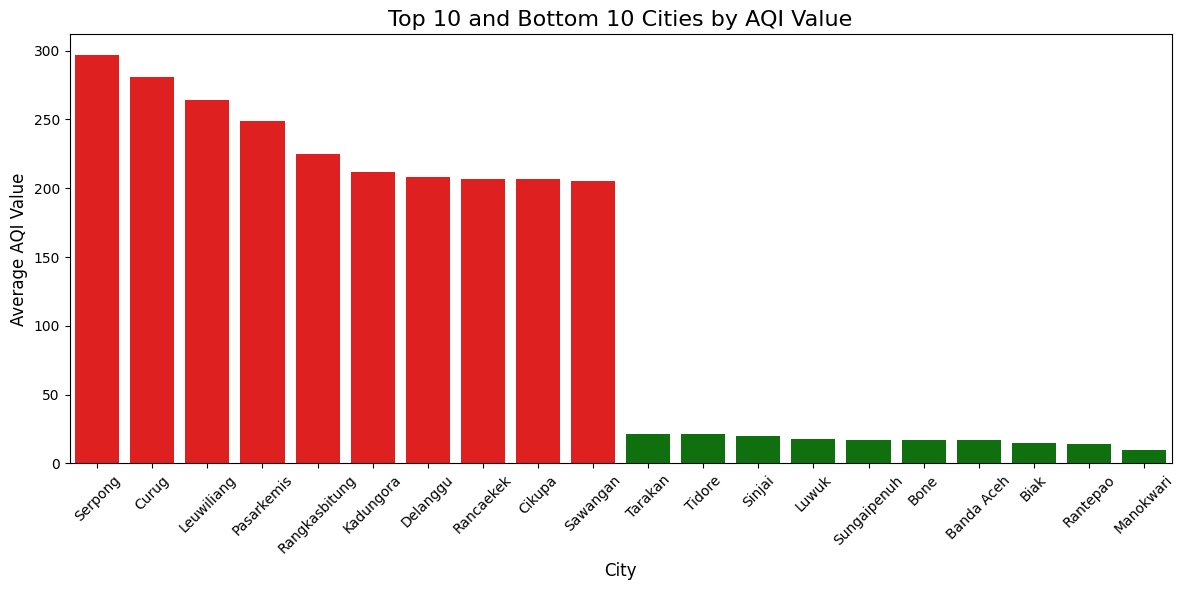

In [123]:
# Grouping data, calculating mean
df_grouped = df.groupby('City')[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].mean()

# Sorting data and selecting top 10 and bottom 10
top_10 = df_grouped.sort_values(by='AQI Value', ascending=False).head(10)
bottom_10 = df_grouped.sort_values(by='AQI Value', ascending=True).head(10)
bottom_10 = bottom_10.sort_values(by='AQI Value', ascending=False)

# Concatenating top 10 and bottom 10 for plotting
highlighted_data = pd.concat([top_10, bottom_10])

# Defining colors: red for top 10, green for bottom 10
colors = ['red'] * 10 + ['green'] * 10

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=highlighted_data.index, y=highlighted_data['AQI Value'], palette=colors)

# Adding titles and labels
plt.title('Top 10 and Bottom 10 Cities by AQI Value', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average AQI Value', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


It can be seen that the 10 cities with the highest AQI values ​​in Indonesia are in densely populated areas and the 10 lowest cities are mostly in the Eastern region of Indonesia which is sparsely populated and has relatively low economic activity.


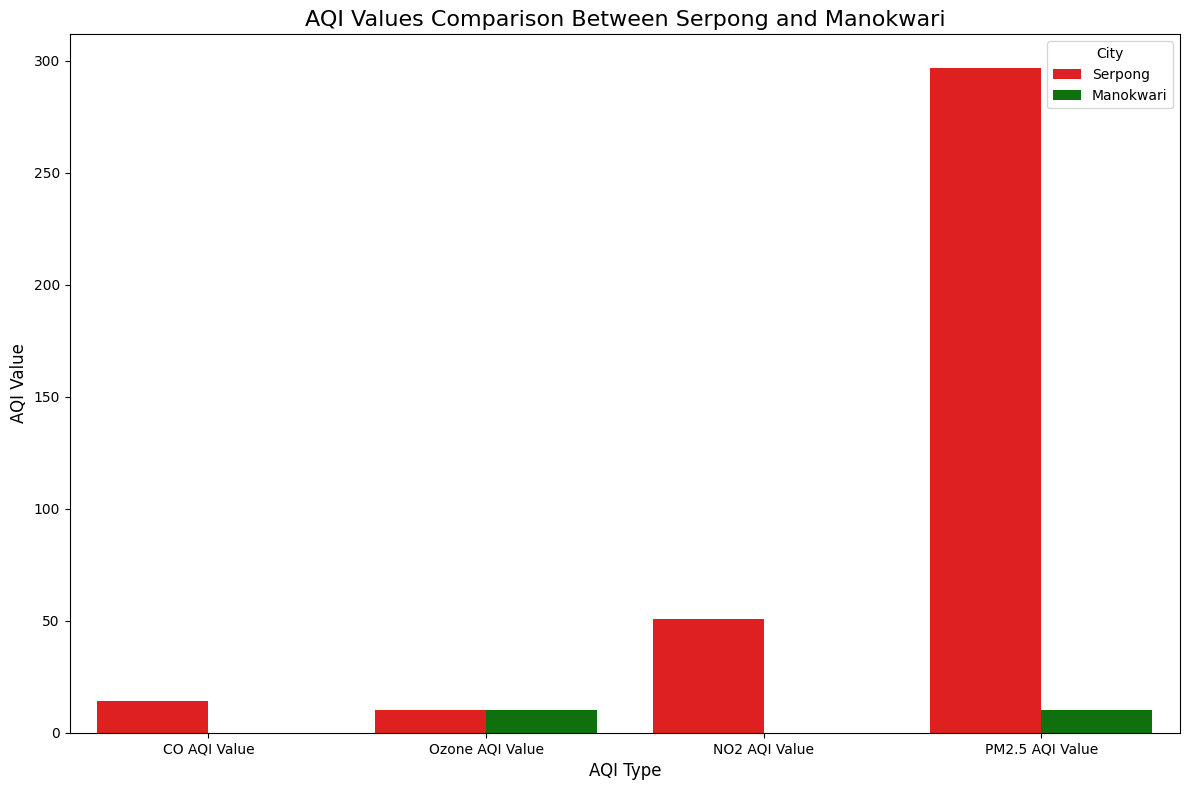

In [124]:
# Filter data for the cities 'Serpong' and 'Manokwari'
serpong_data = df[df['City'] == 'Serpong']
manokwari_data = df[df['City'] == 'Manokwari']

# Selecting relevant columns for the single row
serpong_values = serpong_data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].iloc[0]
manokwari_values = manokwari_data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].iloc[0]

# Combining the data into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'AQI Type': serpong_values.index,
    'Serpong': serpong_values.values,
    'Manokwari': manokwari_values.values
})

# Melting the DataFrame to long format for better plotting with seaborn
comparison_df_melted = comparison_df.melt(id_vars='AQI Type', var_name='City', value_name='AQI Value')

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='AQI Type', y='AQI Value', hue='City', data=comparison_df_melted, palette={'Serpong': 'red', 'Manokwari': 'green'})

# Adding titles and labels
plt.title('AQI Values Comparison Between Serpong and Manokwari', fontsize=16)
plt.xlabel('AQI Type', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


Top 10 Cities by CO AQI Value:
                        City  CO AQI Value
City                                      
Leuwiliang        Leuwiliang          15.0
Curug                  Curug          15.0
Serpong              Serpong          14.0
Delanggu            Delanggu          13.0
Boyolali            Boyolali          12.0
Kadungora          Kadungora          12.0
Rancaekek          Rancaekek          12.0
Bandung              Bandung          11.0
Rangkasbitung  Rangkasbitung          11.0
Pasarkemis        Pasarkemis          11.0 



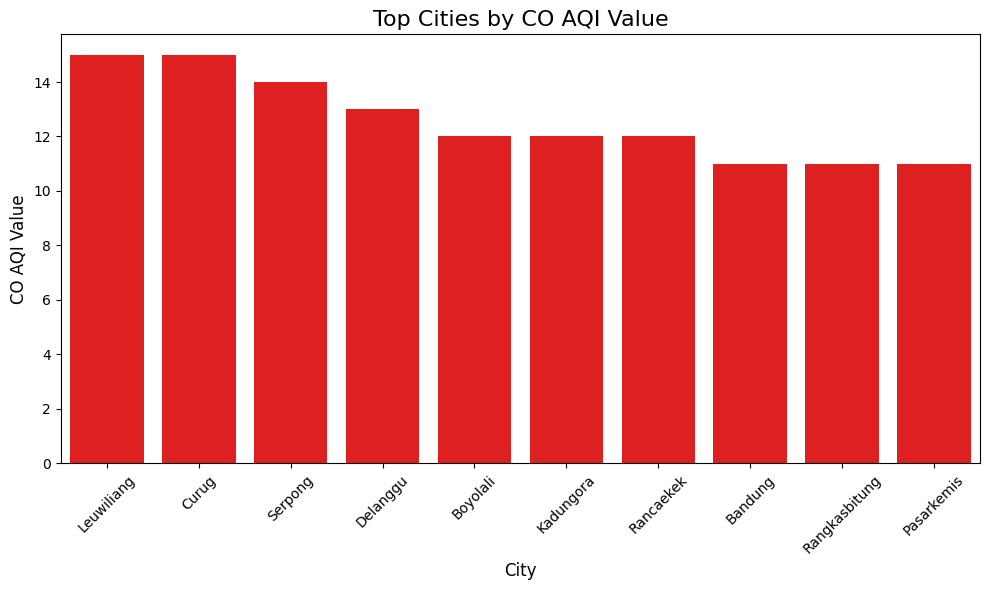

In [125]:
# Sorting by 'CO AQI Value' and selecting top 10
df_sorted_CO = df_grouped.sort_values(by='CO AQI Value', ascending=False).head(10)

# Adding 'City' column for display purposes
df_sorted_CO['City'] = df_sorted_CO.index

print("Top 10 Cities by CO AQI Value:")
print(df_sorted_CO[['City', 'CO AQI Value']], "\n")

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df_sorted_CO['City'], y=df_sorted_CO['CO AQI Value'], color='red')

# Adding titles and labels
plt.title('Top Cities by CO AQI Value', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('CO AQI Value', fontsize=12)
plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


it can be seen that city with highest level of CO pollutants in Indonesia is Leuwiliang, Bogor, Jawa Barat.

*How about other pollutant? Can you show the graphic of top 5 city with highest level of each pollutant? Do as before.*

# Composition

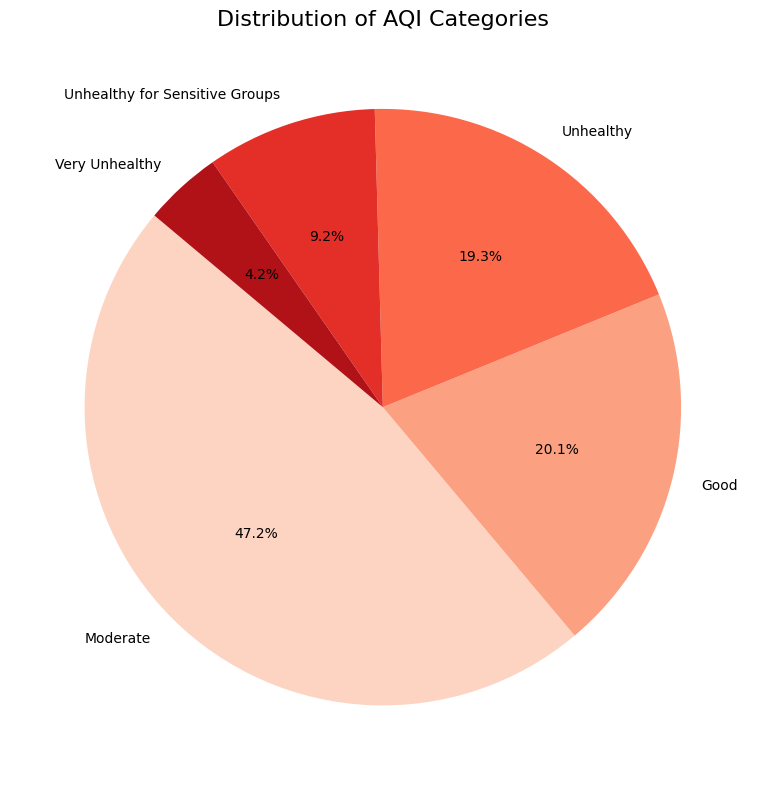

In [126]:
category_counts = df['AQI Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Reds', len(category_counts))
)

# Adding title
plt.title('Distribution of AQI Categories', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


# Distribution

<ipython-input-127-1654baf18985>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AQI Category', y='AQI Value', data=df, palette=inverse_palette)


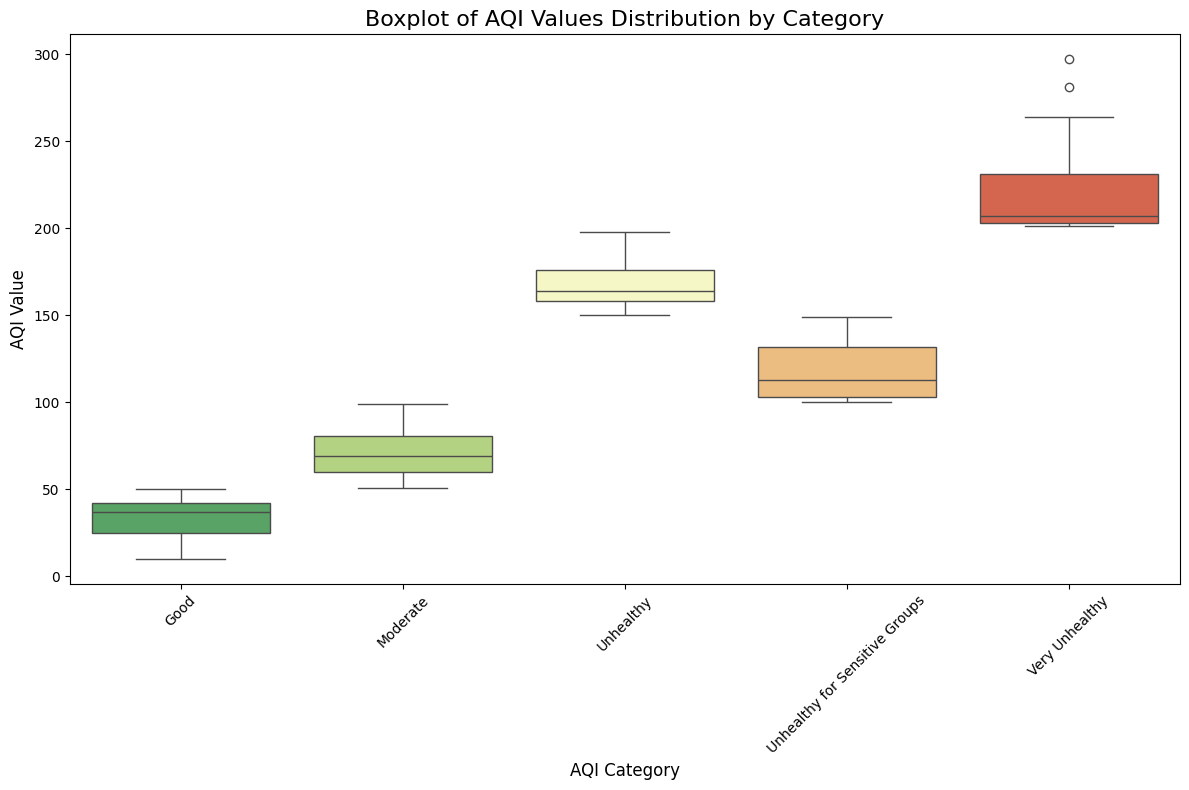

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a custom inverted palette
original_palette = sns.color_palette('RdYlGn', n_colors=5)  # Use a specific number of colors
inverse_palette = original_palette[::-1]  # Reverse the order of colors

# Plotting the boxplot with the inverted palette
plt.figure(figsize=(12, 8))
sns.boxplot(x='AQI Category', y='AQI Value', data=df, palette=inverse_palette)

# Adding titles and labels
plt.title('Boxplot of AQI Values Distribution by Category', fontsize=16)
plt.xlabel('AQI Category', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


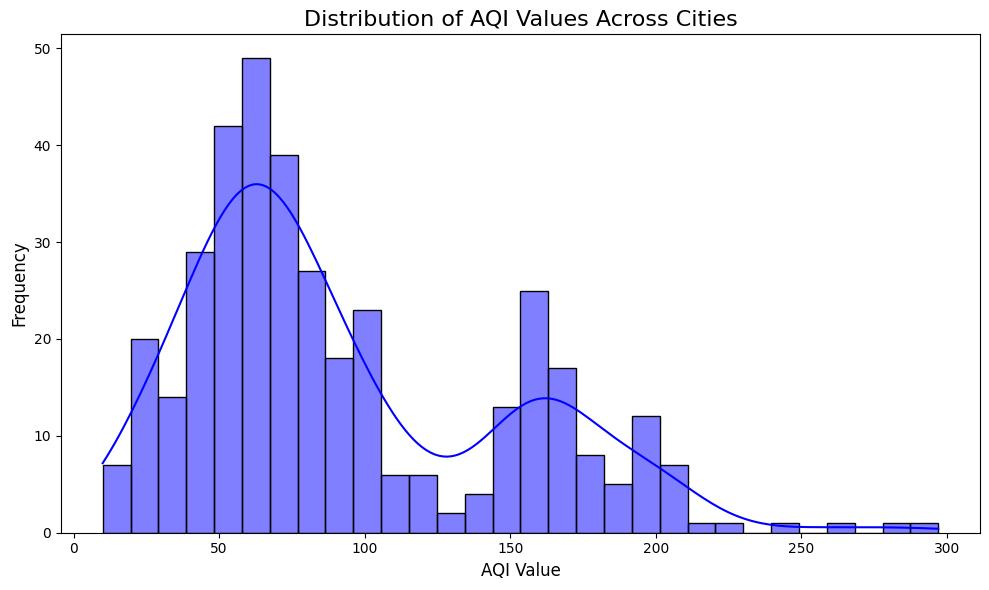

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI Value'], bins=30, kde=True, color='blue')

# Adding titles and labels
plt.title('Distribution of AQI Values Across Cities', fontsize=16)
plt.xlabel('AQI Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


Based on the histogram graph produced, it can be seen that the distribution of AQI values ​​peaks more at 50-70 which when viewed in the previous boxplot is still in the moderate category. Besides that, there is also a second peak that is lower than the first peak, which is at a value of 150-170 which is already in the unhealthy category. Thus, it can be stated that good, moderate, and unhealthy air pollution category are more dominant in 379 cities in Indonesia compared to the unhealthy for sensitive groups and very unhealthy categories.This is in line with the interpretation in the previous pie chart.

# Relationship

The slope of the regression line provides an illustration of the strength of the relationship that exists between each pollutant and the AQI Value. The positive correlation between the major pollutants is displayed in the graph that can be found below.

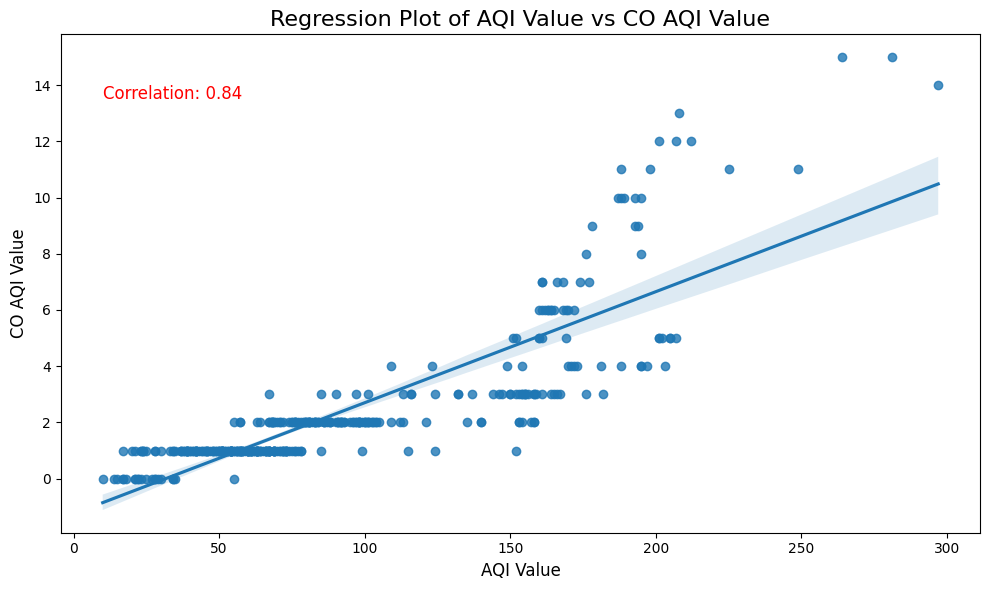

In [129]:
correlation = df[['AQI Value', 'CO AQI Value']].corr().loc['AQI Value', 'CO AQI Value']

# Plotting the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="AQI Value", y="CO AQI Value", data=df)

# Adding titles and labels
plt.title('Regression Plot of AQI Value vs CO AQI Value', fontsize=16)
plt.xlabel('AQI Value', fontsize=12)
plt.ylabel('CO AQI Value', fontsize=12)

# Display the correlation coefficient on the plot
plt.text(
    x=df['AQI Value'].min(),  # X-coordinate for text
    y=df['CO AQI Value'].max() * 0.9,  # Y-coordinate for text
    s=f'Correlation: {correlation:.2f}',  # Text to display
    fontsize=12,
    color='red'
)

# Show plot
plt.tight_layout()
plt.show()


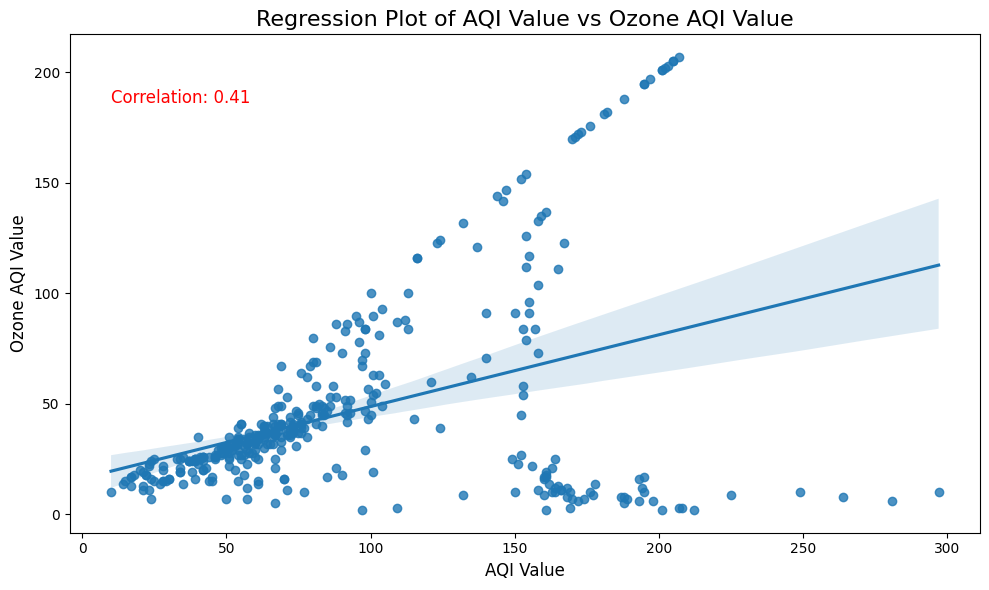

In [130]:
correlation = df[['AQI Value', 'Ozone AQI Value']].corr().loc['AQI Value', 'Ozone AQI Value']

# Plotting the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="AQI Value", y="Ozone AQI Value", data=df)

# Adding titles and labels
plt.title('Regression Plot of AQI Value vs Ozone AQI Value', fontsize=16)
plt.xlabel('AQI Value', fontsize=12)
plt.ylabel('Ozone AQI Value', fontsize=12)

# Display the correlation coefficient on the plot
plt.text(
    x=df['AQI Value'].min(),  # X-coordinate for text
    y=df['Ozone AQI Value'].max() * 0.9,  # Y-coordinate for text
    s=f'Correlation: {correlation:.2f}',  # Text to display
    fontsize=12,
    color='red'
)

# Show plot
plt.tight_layout()
plt.show()


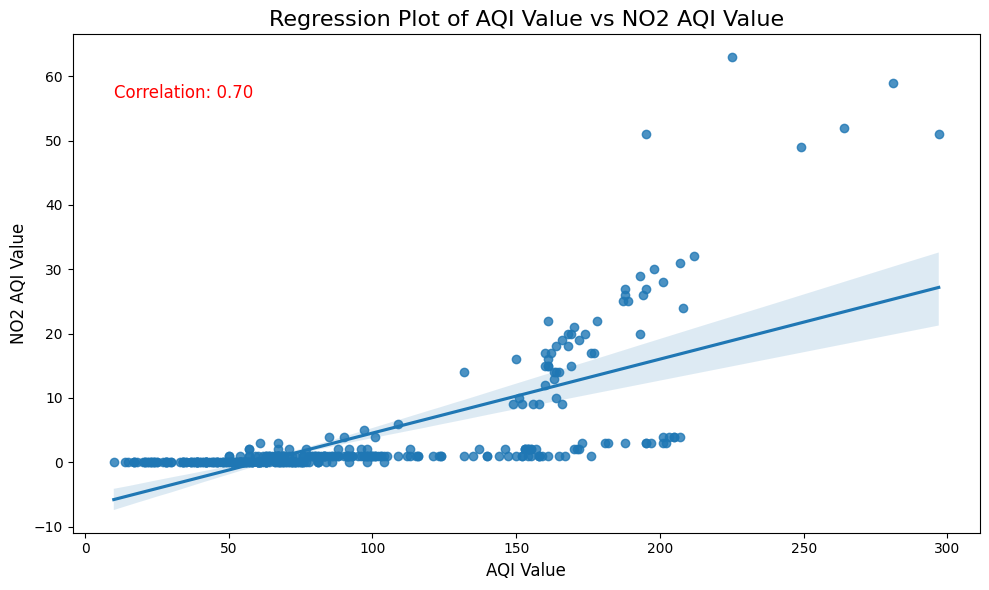

In [131]:
correlation = df[['AQI Value', 'NO2 AQI Value']].corr().loc['AQI Value', 'NO2 AQI Value']

# Plotting the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="AQI Value", y="NO2 AQI Value", data=df)

# Adding titles and labels
plt.title('Regression Plot of AQI Value vs NO2 AQI Value', fontsize=16)
plt.xlabel('AQI Value', fontsize=12)
plt.ylabel('NO2 AQI Value', fontsize=12)

# Display the correlation coefficient on the plot
plt.text(
    x=df['AQI Value'].min(),  # X-coordinate for text
    y=df['NO2 AQI Value'].max() * 0.9,  # Y-coordinate for text
    s=f'Correlation: {correlation:.2f}',  # Text to display
    fontsize=12,
    color='red'
)

# Show plot
plt.tight_layout()
plt.show()


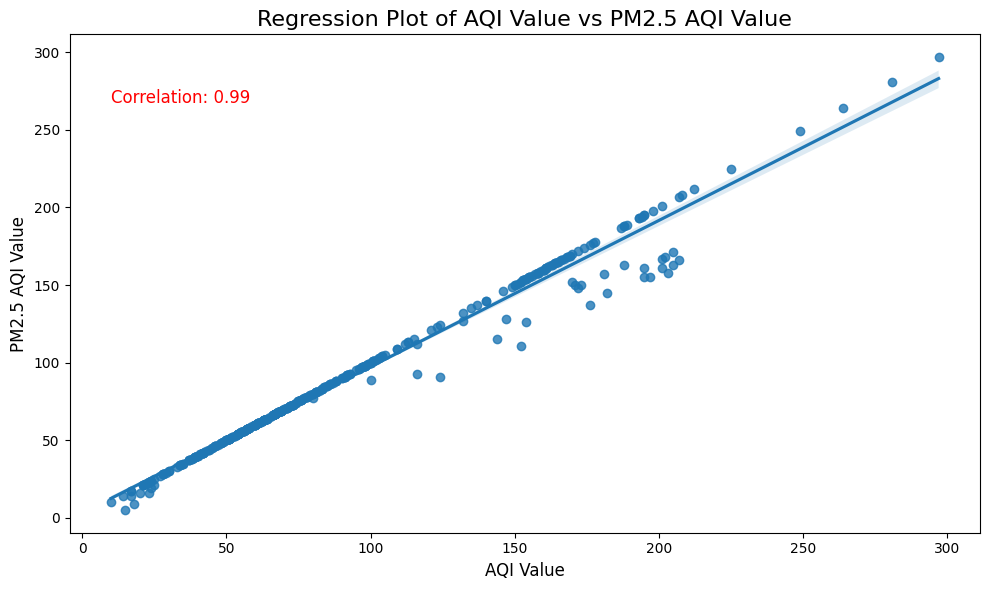

In [132]:
correlation = df[['AQI Value', 'PM2.5 AQI Value']].corr().loc['AQI Value', 'PM2.5 AQI Value']

# Plotting the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="AQI Value", y="PM2.5 AQI Value", data=df)

# Adding titles and labels
plt.title('Regression Plot of AQI Value vs PM2.5 AQI Value', fontsize=16)
plt.xlabel('AQI Value', fontsize=12)
plt.ylabel('PM2.5 AQI Value', fontsize=12)

# Display the correlation coefficient on the plot
plt.text(
    x=df['AQI Value'].min(),  # X-coordinate for text
    y=df['PM2.5 AQI Value'].max() * 0.9,  # Y-coordinate for text
    s=f'Correlation: {correlation:.2f}',  # Text to display
    fontsize=12,
    color='red'
)

# Show plot
plt.tight_layout()
plt.show()


Variables such as NO2 AQI Value & AQI Value, PM2.5 AQI Value & AQI Value and CO AQI Value & AQI Value are having strong positive correlation. This means that when one variable increases, the other variable also increases such as if Indonesia's AQI value of Ozone increase then the AQI value of Carbon Monoxide also increase.